In [1]:
import MeCab
import pandas as pd
import numpy as np

In [2]:
tagger = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')
#tagger = MeCab.Tagger()
with open('movie_review.txt','r',encoding='utf-8') as f:
    my_sentence=f.read()
#my_sentence

In [3]:
print(tagger.parse(my_sentence))

<	SY,*,*,*,*,*,*,*
아	IC,*,F,아,*,*,*,*
재밌	VA,*,T,재밌,*,*,*,*
다	EF,*,F,다,*,*,*,*
!	SF,*,*,*,*,*,*,*
!	SY,*,*,*,*,*,*,*
또	MAG,성분부사|시간부사,F,또,*,*,*,*
봐야지	VV+EF,*,F,봐야지,Inflect,VV,EF,보/VV/*+ㅏ야지/EF/*
!	SF,*,*,*,*,*,*,*
!>	SY,*,*,*,*,*,*,*
코미디	NNG,*,F,코미디,*,*,*,*
영화	NNG,*,F,영화,*,*,*,*
의	JKG,*,F,의,*,*,*,*
미덕	NNG,정적사태,T,미덕,*,*,*,*
은	JX,*,T,은,*,*,*,*
뭐	NP,*,F,뭐,*,*,*,*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
뭐	NP,*,F,뭐,*,*,*,*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
해도	VV+EC,*,F,해도,Inflect,VV,EC,하/VV/*+아도/EC/*
웃기	VV,*,F,웃기,*,*,*,*
는	ETM,*,T,는,*,*,*,*
거	NNB,*,F,거,*,*,*,*
다	VCP+EF,*,F,다,Inflect,VCP,EF,이/VCP/*+다/EF/*
.	SF,*,*,*,*,*,*,*
다만	MAJ,*,T,다만,*,*,*,*
그	MM,~명사,F,그,*,*,*,*
소재	NNG,*,F,소재,*,*,*,*
와	JC,*,F,와,*,*,*,*
방법	NNG,*,T,방법,*,*,*,*
이	JKS,*,F,이,*,*,*,*
개개인	NNG,*,T,개개인,Compound,*,*,개개/NNG/*+인/NNG/*
의	JKG,*,F,의,*,*,*,*
취향	NNG,*,T,취향,*,*,*,*
에	JKB,*,F,에,*,*,*,*
들어맞	VV,*,T,들어맞,*,*,*,*
느냐	EC,*,F,느냐,*,*,*,*
가	JKS,*,F,가,*,*,*,*
관건	NNG,*,T,관건,*,*,*,*
인데	VCP+EC,*,F,인데,Inflect,VCP,EC,이/VCP/*+ᆫ

In [4]:
def mecabsplit(mecab_tagger,inputs, pos):
    r=[]
    inputs = mecab_tagger.parse(inputs)
    t = inputs.split('\n')[:-2]
    for i in t:
        field = i.split('\t')
        if field[1].split(',')[-1] is not '*':
            r.extend( [ (x.split('/')[0],x.split('/')[1]) for x in field[1].split(',')[-1].split('+') ] )
        else:
            r.append( (field[0],field[1].split(',')[0]) )
    if pos:
        return r
    else:
        return [ x[0] for x in r ]
    return r

In [5]:
# 일반 명사
nng = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNG']
# 고유 명사
nnp = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNP']

In [6]:
from collections import Counter,OrderedDict

In [7]:
# matplotlib 에서 한글 깨짐 현상 해결
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정 부분 필요한 하나만 선택, 나머지 주석 처리
#font_fname = "c:/Windows/Fonts/malgun.ttf" # windows
font_fname = "/Library/Fonts/AppleGothic.ttf" # mac
#font_fname = "/usr/share/fonts/nanumfont/NanumGothic.ttf" # linux

font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [8]:
count_list=Counter(nng)
print(len(count_list))

156


In [9]:
# counter안의 value를 sort해줌
sorted_list=count_list.most_common()
# 다시 dictionary 형태로 변환
sorted_list=OrderedDict(sorted_list)

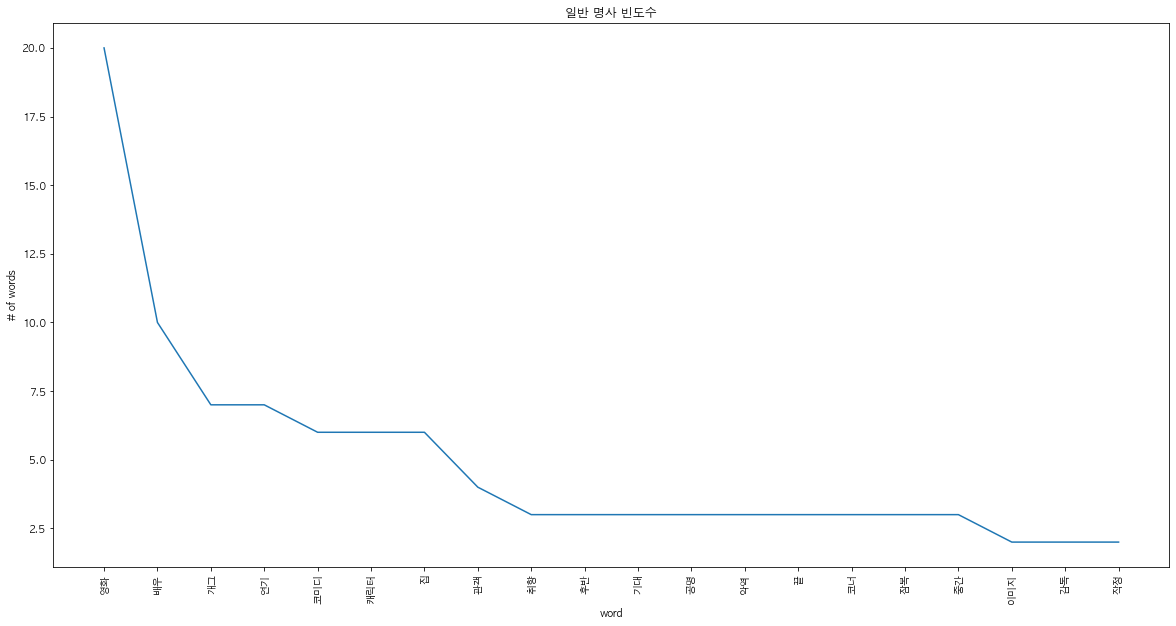

In [10]:
length=20
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(sorted_list.keys())[:length], list(sorted_list.values())[:length])
plt.title("일반 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()

In [11]:
count_list=Counter(nnp)
print(len(count_list))

17


In [12]:
# counter안의 value를 sort해줌
sorted_list=count_list.most_common()
# 다시 dictionary 형태로 변환
sorted_list=OrderedDict(sorted_list)

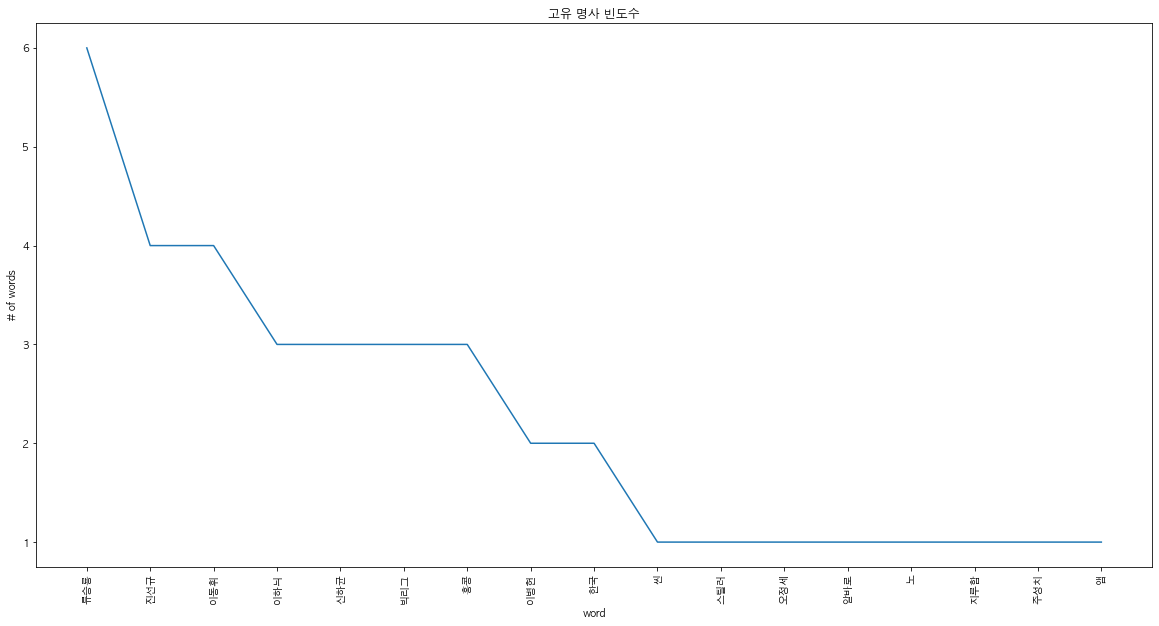

In [13]:
length=20
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(sorted_list.keys())[:length], list(sorted_list.values())[:length])
plt.title("고유 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()